#CNN MODEL on Gender Classification

Steps for model building

* Step 1: Data Load
* Step 2: Data Normalized (scaling between 0 and 1)
* Step 3: Building CNN Model
* Step 4: Compiling our Model
* Step 5: Fiting our Model
* Step 6: Improving our model (if our model accuracy is low)
* Step 7: Prediction with new data on our trained model

#Step 1: Data Loading

Load the Data and Knowing about it.

## Extracting the Data
https://www.kaggle.com/datasets/cashutosh/gender-classification-dataset

In [ ]:
import zipfile
zip_ref= zipfile.ZipFile("/content/archive.zip")
zip_ref.extractall()
zip_ref.close()

## Knowing Your Data
Geting the class name of the Data

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/Training")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['female' 'male']


##Knowing Your Data

Visualazing the Data for better understanding the format and geting its shape

(-0.5, 87.5, 109.5, -0.5)

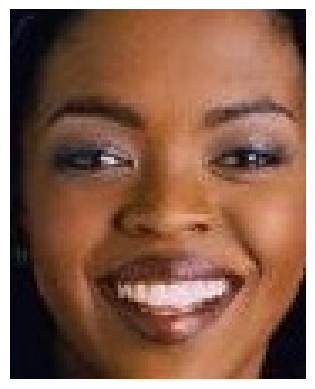

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("/content/Training/female/131423.jpg.jpg")
plt.imshow(image)
plt.axis(False)

In [ ]:
image.shape

(110, 88, 3)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/content/Training"
test_dir = "/content/Validation"

##Step 2: Data Normalisation(scaling data between 0 and 1)
Rescaling the data in between 0 and 1 by letting it divide by 255. the . after 255 is for the float conversion.

Usually pixel size ranges from 0 to 255 so if the max pixel divided by 225.0 there we would get data array between 0 and 1.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

In [ ]:
# turning data into batches

train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               target_size = (224,224), # resizing the data shape
                                               batch_size = 32,         # dividing the data in 32 batches
                                               class_mode = "binary",   # binary cause the output can be only one either male or female.
                                               seed = 42)
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = "binary",
                                               seed = 42)

Found 47009 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


#Step 3: Model Building
 #Step 4: Model Compilation
 #Step 5: MOdel Fiting

In [ ]:
# building CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,kernel_size = 3, activation = "relu", input_shape =(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size = 2 , padding = 'valid'),

    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation = "sigmoid")
])

#compiling our model
model.compile(loss = "binary_crossentropy",
              optimizer = 'Adam',
              metrics = ['accuracy'])

#fiting the model
m1 = model.fit(train_data, epochs = 5,)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1470/1470 ━━━━━━━━━━━━━━━━━━━━ 73s 44ms/step - accuracy: 0.8346 - loss: 0.3670
Epoch 2/5
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 72s 41ms/step - accuracy: 0.9212 - loss: 0.2115
Epoch 3/5
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 63s 43ms/step - accuracy: 0.9285 - loss: 0.1929
Epoch 4/5
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 83s 43ms/step - accuracy: 0.9368 - loss: 0.1715
Epoch 5/5
1470/1470 ━━━━━━━━━━━━━━━━━━━━ 77s 40ms/step - accuracy: 0.9412 - loss: 0.1578


In [ ]:
model.evaluate(test_data)

365/365 ━━━━━━━━━━━━━━━━━━━━ 16s 39ms/step - accuracy: 0.9349 - loss: 0.1781


[0.1750500500202179, 0.9344149827957153]

(169, 152, 3)

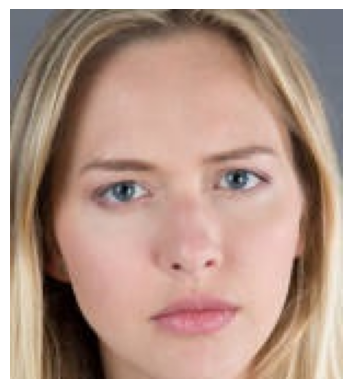

In [ ]:
im= mpimg.imread("/content/pic.jpg")
plt.imshow(im)
plt.axis(False)
im.shape

array([[[105, 114, 121],
        [105, 114, 121],
        [106, 113, 123],
        ...,
        [107, 113, 127],
        [107, 113, 127],
        [107, 113, 127]],

       [[105, 114, 121],
        [105, 114, 121],
        [106, 113, 123],
        ...,
        [107, 113, 127],
        [107, 113, 127],
        [107, 113, 127]],

       [[106, 113, 121],
        [106, 113, 121],
        [106, 113, 123],
        ...,
        [107, 113, 127],
        [107, 113, 127],
        [107, 113, 127]],

       ...,

       [[209, 192, 162],
        [214, 197, 167],
        [201, 184, 156],
        ...,
        [238, 225, 208],
        [225, 213, 191],
        [214, 204, 179]],

       [[210, 193, 163],
        [214, 197, 167],
        [201, 184, 156],
        ...,
        [239, 226, 207],
        [225, 214, 194],
        [213, 205, 182]],

       [[219, 202, 174],
        [205, 188, 160],
        [214, 197, 169],
        ...,
        [242, 229, 210],
        [236, 228, 207],
        [213, 207, 185]]], dtype=uint8)
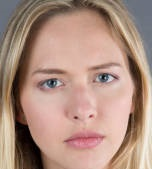

In [ ]:
im

In [ ]:
expand_image = tf.expand_dims(im, axis = 0)

In [ ]:
model.predict(expand_image)

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 28090, but received input with shape (1, 13650)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 169, 152, 3), dtype=uint8)
  • training=False
  • mask=None

# It's important to preprocess our input data in same format as our trained data

In [ ]:
def load_and_prep(filename, img_shape = 224):
  #read image
  img = tf.io.read_file(filename)
  #decode
  img = tf.image.decode_image(img)
  #resize the image
  img = tf.image.resize(img, size =[img_shape, img_shape])
  #rescale
  img= img/255.
  return img

In [ ]:
image = load_and_prep("/content/pic.jpg")
image

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.4117647 , 0.44705883, 0.4745098 ],
        [0.4117647 , 0.44705883, 0.4745098 ],
        [0.4117647 , 0.44705883, 0.4745098 ],
        ...,
        [0.41960785, 0.44313726, 0.49019608],
        [0.41960785, 0.44313726, 0.49019608],
        [0.41960785, 0.44313726, 0.49019608]],

       [[0.4117647 , 0.44705883, 0.4745098 ],
        [0.4117647 , 0.44705883, 0.4745098 ],
        [0.4117647 , 0.44705883, 0.4745098 ],
        ...,
        [0.41960785, 0.44313726, 0.49019608],
        [0.41960785, 0.44313726, 0.49019608],
        [0.41960785, 0.44313726, 0.49019608]],

       [[0.4117647 , 0.44705883, 0.47148108],
        [0.4117647 , 0.44705883, 0.47148108],
        [0.4117647 , 0.44705883, 0.47207603],
        ...,
        [0.41960785, 0.44313726, 0.49019608],
        [0.41960785, 0.44313726, 0.49019608],
        [0.41960785, 0.44313726, 0.49019608]],

       ...,

       [[0.81960785, 0.7529412 , 0.63529414],
        [0.82

In [ ]:
model.predict(tf.expand_dims(image, axis= 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 797ms/step


array([[0.17778862]], dtype=float32)

In [ ]:
# creating a function to visualize and get the output with the class name
def pred_and_plot(model,filename,class_names = class_names):
  # import the image  and preprocess it
  img = load_and_prep(filename)
  #prediction
  pred= model.predict(tf.expand_dims(img, axis=0))
  # get its class names
  pred_class = class_names[int(tf.round(pred))]
  # plot the predicted class
  plt.imshow(img)
  plt.title(f"Predictiom: {pred_class}")
  plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


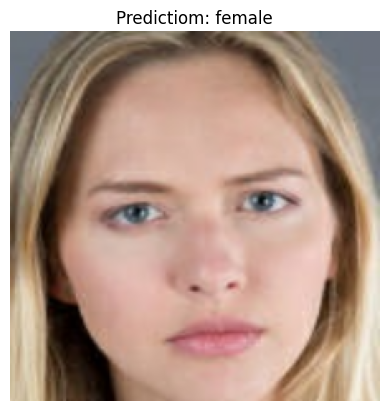

In [ ]:
pred_and_plot(model,"/content/pic.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


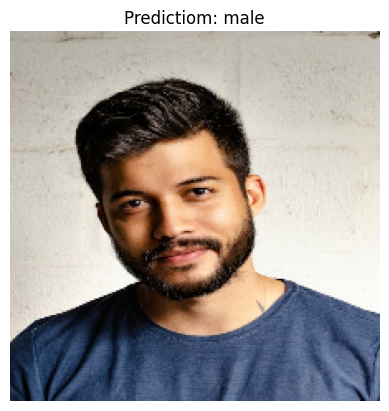

In [ ]:
pred_and_plot(model, "/content/pexels-photo-2379005.jpeg")